In [12]:
import os

import timm
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt

from training import batch_train
from eurosat import unnormalize, EuroSat

### Device

In [32]:
device = ("cuda" if torch.cuda.is_available() else "mps" if torch.backends.mps.is_available() else "cpu")
print(f"Device: {device}")

### Parameters

In [15]:
batch_size = 64
learning_rate = 3e-4
num_epochs = 20

### Data

In [16]:
train_data = EuroSat(load_dataset("timm/eurosat-rgb", split='train'))
val_data = EuroSat(load_dataset("timm/eurosat-rgb", split='validation'))
test_data = EuroSat(load_dataset("timm/eurosat-rgb", split='test'))


train_dataloader = DataLoader(train_data, batch_size=batch_size, shuffle=True, num_workers=2)
val_dataloader = DataLoader(val_data, batch_size=batch_size, shuffle=False, num_workers=2)
test_dataloader = DataLoader(test_data, batch_size=batch_size, shuffle=False, num_workers=2)

In [ ]:
classes = [
    'AnnualCrop',
    'Forest',
    'HerbaceousVegetation',
    'Highway',
    'Industrial',
    'Pasture',
    'PermanentCrop',
    'Residential',
    'River',
    'SeaLake',
]

### Model

In [17]:
os.makedirs("models", exist_ok=True)

model = timm.create_model('resnet50', pretrained=True, num_classes=10)
model= nn.DataParallel(model)
model.to(device)

optimizer = torch.optim.AdamW(model.parameters(), lr=learning_rate)
scheduler = torch.optim.lr_scheduler.PolynomialLR(optimizer, total_iters=num_epochs)
criterion = nn.CrossEntropyLoss()

### Training

In [18]:
for epoch in range(num_epochs):
    print(f"Epoch: {epoch+1}")
    avg_loss, avg_vloss, acc, vacc = batch_train(
        model = model,
        device = device,
        train_loader = train_dataloader,
        val_loader = val_dataloader,
        optimizer = optimizer,
        criterion = criterion,
        scheduler = scheduler
    )

torch.cuda.empty_cache()

Epoch: 1


Training: 100%|██████████| 254/254 [01:30<00:00,  2.82batch/s, loss=0.652, accuracy=81.6]


Train: Avg loss: 0.651917, Accuracy: 81.57%


Validation: 100%|██████████| 85/85 [00:12<00:00,  6.98batch/s, val_loss=0.19, val_accuracy=94]   


Validation: Avg loss: 0.190055, Accuracy: 94.00%
Epoch: 2


Training: 100%|██████████| 254/254 [01:30<00:00,  2.81batch/s, loss=0.167, accuracy=94.7]


Train: Avg loss: 0.166969, Accuracy: 94.75%


Validation: 100%|██████████| 85/85 [00:12<00:00,  7.03batch/s, val_loss=0.115, val_accuracy=96.5]


Validation: Avg loss: 0.115320, Accuracy: 96.46%
Epoch: 3


Training: 100%|██████████| 254/254 [01:30<00:00,  2.81batch/s, loss=0.117, accuracy=96.3]


Train: Avg loss: 0.116620, Accuracy: 96.31%


Validation: 100%|██████████| 85/85 [00:12<00:00,  6.87batch/s, val_loss=0.099, val_accuracy=96.8] 


Validation: Avg loss: 0.098958, Accuracy: 96.78%
Epoch: 4


Training: 100%|██████████| 254/254 [01:30<00:00,  2.80batch/s, loss=0.0804, accuracy=97.5]


Train: Avg loss: 0.080362, Accuracy: 97.52%


Validation: 100%|██████████| 85/85 [00:12<00:00,  6.98batch/s, val_loss=0.065, val_accuracy=97.9] 


Validation: Avg loss: 0.065005, Accuracy: 97.91%
Epoch: 5


Training: 100%|██████████| 254/254 [01:30<00:00,  2.80batch/s, loss=0.0772, accuracy=97.5]


Train: Avg loss: 0.077223, Accuracy: 97.48%


Validation: 100%|██████████| 85/85 [00:12<00:00,  7.03batch/s, val_loss=0.0694, val_accuracy=97.6]


Validation: Avg loss: 0.069356, Accuracy: 97.57%
Epoch: 6


Training: 100%|██████████| 254/254 [01:30<00:00,  2.80batch/s, loss=0.0622, accuracy=97.9]


Train: Avg loss: 0.062245, Accuracy: 97.92%


Validation: 100%|██████████| 85/85 [00:12<00:00,  6.55batch/s, val_loss=0.053, val_accuracy=98.3] 


Validation: Avg loss: 0.053021, Accuracy: 98.33%
Epoch: 7


Training: 100%|██████████| 254/254 [01:30<00:00,  2.81batch/s, loss=0.0523, accuracy=98.6]


Train: Avg loss: 0.052271, Accuracy: 98.56%


Validation: 100%|██████████| 85/85 [00:12<00:00,  6.54batch/s, val_loss=0.058, val_accuracy=98.1] 


Validation: Avg loss: 0.058010, Accuracy: 98.11%
Epoch: 8


Training: 100%|██████████| 254/254 [01:30<00:00,  2.80batch/s, loss=0.0486, accuracy=98.5]


Train: Avg loss: 0.048603, Accuracy: 98.49%


Validation: 100%|██████████| 85/85 [00:12<00:00,  7.03batch/s, val_loss=0.0519, val_accuracy=98.2]


Validation: Avg loss: 0.051879, Accuracy: 98.19%
Epoch: 9


Training: 100%|██████████| 254/254 [01:30<00:00,  2.80batch/s, loss=0.0434, accuracy=98.9]


Train: Avg loss: 0.043395, Accuracy: 98.85%


Validation: 100%|██████████| 85/85 [00:12<00:00,  6.74batch/s, val_loss=0.058, val_accuracy=98.3] 


Validation: Avg loss: 0.058036, Accuracy: 98.28%
Epoch: 10


Training: 100%|██████████| 254/254 [01:30<00:00,  2.81batch/s, loss=0.0334, accuracy=99.1]


Train: Avg loss: 0.033439, Accuracy: 99.08%


Validation: 100%|██████████| 85/85 [00:12<00:00,  6.90batch/s, val_loss=0.0507, val_accuracy=98.4]


Validation: Avg loss: 0.050745, Accuracy: 98.35%
Epoch: 11


Training: 100%|██████████| 254/254 [01:30<00:00,  2.81batch/s, loss=0.0299, accuracy=99.1]


Train: Avg loss: 0.029933, Accuracy: 99.14%


Validation: 100%|██████████| 85/85 [00:12<00:00,  6.87batch/s, val_loss=0.0519, val_accuracy=98.4]


Validation: Avg loss: 0.051928, Accuracy: 98.35%
Epoch: 12


Training: 100%|██████████| 254/254 [01:30<00:00,  2.80batch/s, loss=0.0283, accuracy=99.2]


Train: Avg loss: 0.028323, Accuracy: 99.23%


Validation: 100%|██████████| 85/85 [00:12<00:00,  6.98batch/s, val_loss=0.0509, val_accuracy=98.2]


Validation: Avg loss: 0.050856, Accuracy: 98.20%
Epoch: 13


Training: 100%|██████████| 254/254 [01:31<00:00,  2.79batch/s, loss=0.0215, accuracy=99.4]


Train: Avg loss: 0.021507, Accuracy: 99.40%


Validation: 100%|██████████| 85/85 [00:12<00:00,  6.99batch/s, val_loss=0.0439, val_accuracy=98.5]


Validation: Avg loss: 0.043944, Accuracy: 98.54%
Epoch: 14


Training: 100%|██████████| 254/254 [01:30<00:00,  2.79batch/s, loss=0.02, accuracy=99.5]  


Train: Avg loss: 0.020029, Accuracy: 99.46%


Validation: 100%|██████████| 85/85 [00:12<00:00,  7.05batch/s, val_loss=0.0484, val_accuracy=98.4]


Validation: Avg loss: 0.048358, Accuracy: 98.41%
Epoch: 15


Training: 100%|██████████| 254/254 [01:30<00:00,  2.81batch/s, loss=0.0165, accuracy=99.5]


Train: Avg loss: 0.016469, Accuracy: 99.49%


Validation: 100%|██████████| 85/85 [00:12<00:00,  6.94batch/s, val_loss=0.0516, val_accuracy=98.5]


Validation: Avg loss: 0.051569, Accuracy: 98.52%
Epoch: 16


Training: 100%|██████████| 254/254 [01:31<00:00,  2.79batch/s, loss=0.016, accuracy=99.7] 


Train: Avg loss: 0.015968, Accuracy: 99.65%


Validation: 100%|██████████| 85/85 [00:12<00:00,  6.88batch/s, val_loss=0.0472, val_accuracy=98.6]


Validation: Avg loss: 0.047181, Accuracy: 98.57%
Epoch: 17


Training: 100%|██████████| 254/254 [01:30<00:00,  2.80batch/s, loss=0.0141, accuracy=99.7]


Train: Avg loss: 0.014061, Accuracy: 99.71%


Validation: 100%|██████████| 85/85 [00:12<00:00,  6.93batch/s, val_loss=0.0501, val_accuracy=98.5]


Validation: Avg loss: 0.050128, Accuracy: 98.50%
Epoch: 18


Training: 100%|██████████| 254/254 [01:30<00:00,  2.80batch/s, loss=0.0107, accuracy=99.7] 


Train: Avg loss: 0.010664, Accuracy: 99.71%


Validation: 100%|██████████| 85/85 [00:12<00:00,  6.83batch/s, val_loss=0.0434, val_accuracy=98.6]


Validation: Avg loss: 0.043407, Accuracy: 98.56%
Epoch: 19


Training: 100%|██████████| 254/254 [01:30<00:00,  2.81batch/s, loss=0.0133, accuracy=99.8] 


Train: Avg loss: 0.013293, Accuracy: 99.75%


Validation: 100%|██████████| 85/85 [00:12<00:00,  6.92batch/s, val_loss=0.0459, val_accuracy=98.6]


Validation: Avg loss: 0.045878, Accuracy: 98.63%
Epoch: 20


Training: 100%|██████████| 254/254 [01:30<00:00,  2.81batch/s, loss=0.0127, accuracy=99.8] 


Train: Avg loss: 0.012741, Accuracy: 99.80%


Validation: 100%|██████████| 85/85 [00:12<00:00,  6.92batch/s, val_loss=0.0392, val_accuracy=99]  


Validation: Avg loss: 0.039195, Accuracy: 98.96%


In [39]:
torch.save(model.module.state_dict(), 'resnet50_eurosat.pth')

### Evaluation

/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/opt/conda/lib/python3.10/site-packages/torch/nn/parallel/parallel_apply.py:79: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.device(device), torch.cuda.stream(stream), autocast(enabled=autocast_enabled):
/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


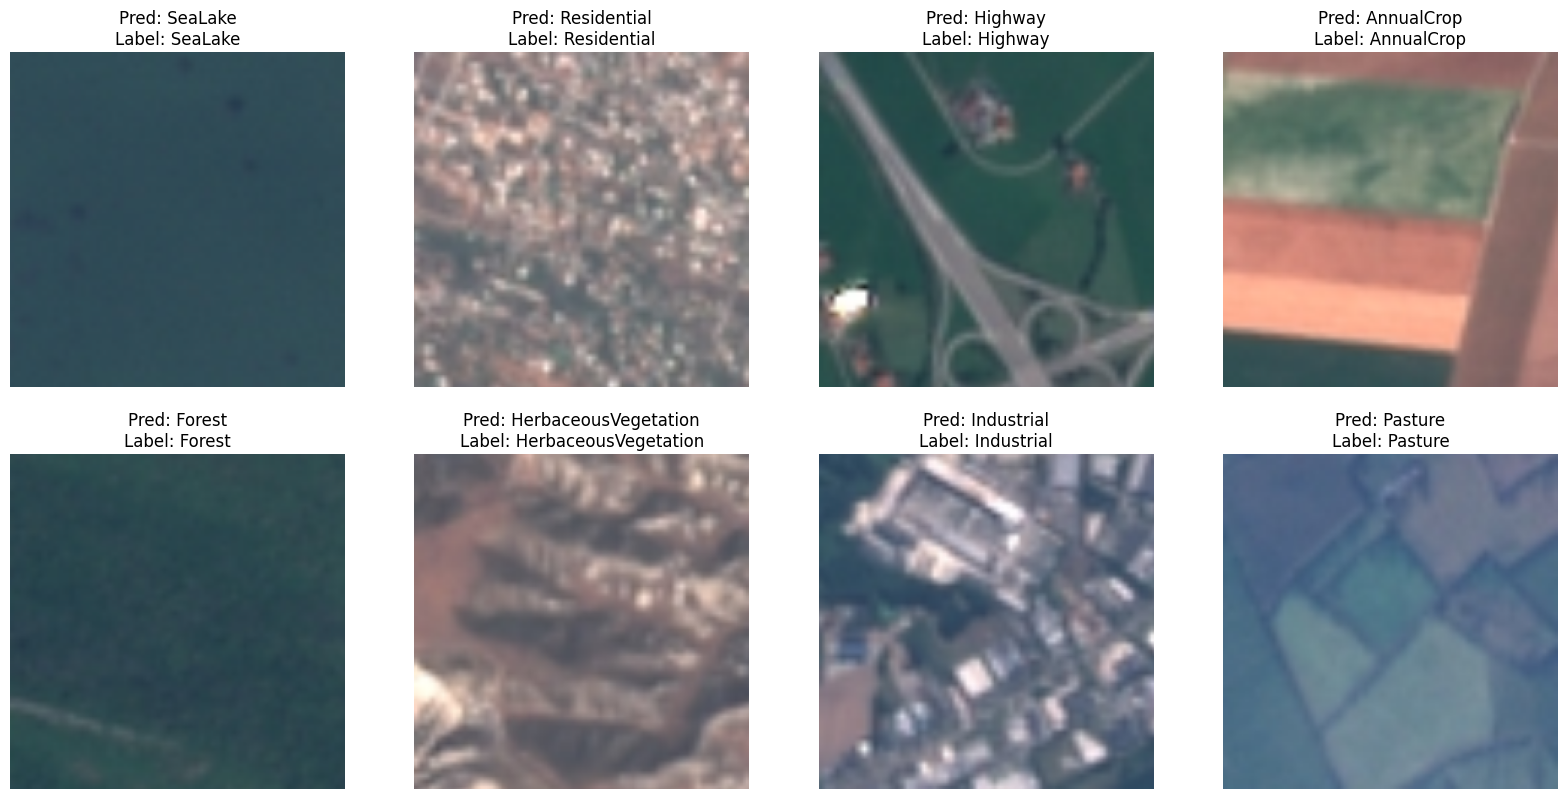

Accuracy: 0.9894
Precision: 0.9895
Recall: 0.9890
F1 Score: 0.9892
Confusion Matrix:
[[593   0   0   0   0   1   2   0   0   0]
 [  0 603   3   0   0   2   0   0   0   0]
 [  1   0 568   0   0   2   2   0   0   0]
 [  1   0   0 495   0   0   0   0   0   0]
 [  0   0   0   0 496   0   0   4   1   0]
 [  1   1   4   0   0 388   2   0   0   0]
 [  7   0  10   0   1   0 520   0   0   0]
 [  0   0   0   1   2   0   0 551   0   0]
 [  1   0   0   5   1   0   0   0 521   1]
 [  0   0   1   0   0   0   0   0   0 608]]


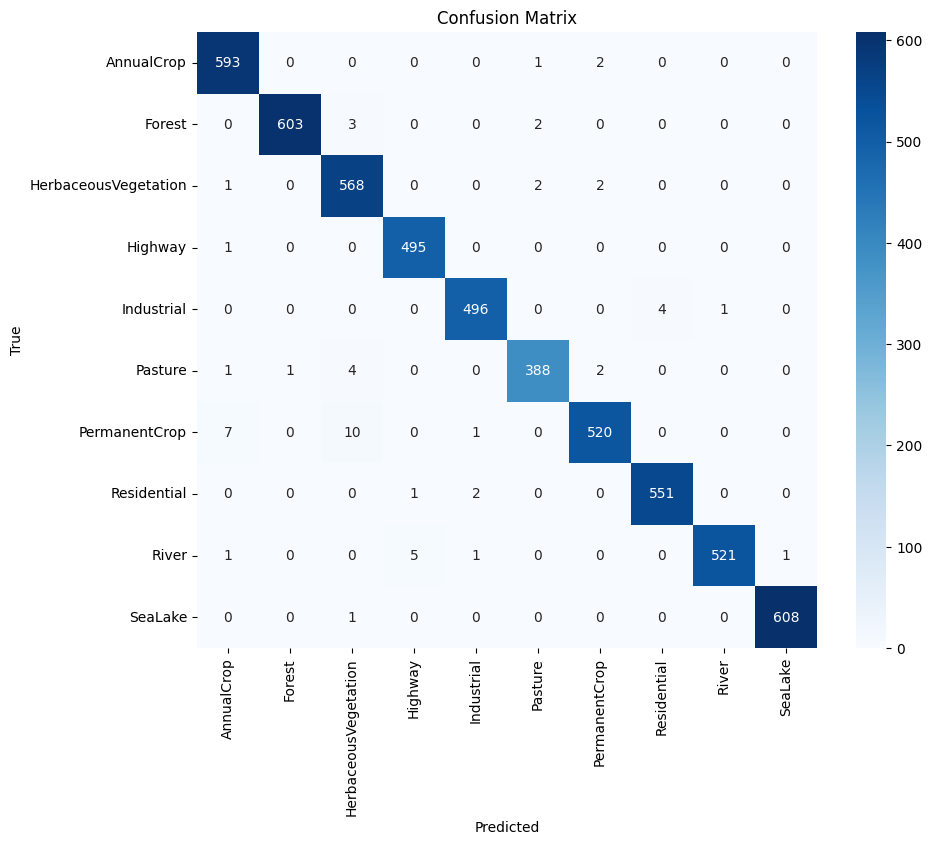

In [38]:
all_preds = []
all_labels = []
batch_size = 16 


model.eval()
with torch.no_grad():
    for batch_idx, (data, target) in enumerate(test_dataloader):
        images, labels = data.to(device), target.to(device)

        outputs = model(images)
        _, preds = torch.max(outputs, 1)
        
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

plt.figure(figsize=(20, 20))
for i in range(len(images)):
    ax = plt.subplot(4, 4, i + 1)
    plt.imshow(unnormalize(images[i], mean, std).permute(1, 2, 0).cpu().numpy())  
    plt.title(f"Pred: {classes[preds[i]]}\nLabel: {classes[labels[i]]}")
    plt.axis('off')
plt.show()

all_preds = np.array(all_preds)
all_labels = np.array(all_labels)

accuracy = accuracy_score(all_labels, all_preds)
precision = precision_score(all_labels, all_preds, average='macro')
recall = recall_score(all_labels, all_preds, average='macro')
f1 = f1_score(all_labels, all_preds, average='macro')
conf_matrix = confusion_matrix(all_labels, all_preds)

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'Confusion Matrix:\n{conf_matrix}')

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()